The main objective in this document is to build and evaluate a binary classifier capable of predicting whether a tumor is malignant or benign based on a set of numerical diagnostic features.

First we fetch breast cancer data from:
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
and separate the data into two variables.

In [64]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


Information of the variables.

All of the role == 'Feature' rows belong to the X-variable and naturally the role == 'Target' to the y-variable.

The 'ID' is just metadata to identify the rows and does not belong to features nor targets.

In [65]:
breast_cancer_wisconsin_diagnostic.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


Metadata of the dataset.

In [66]:
breast_cancer_wisconsin_diagnostic.metadata

{'uci_id': 17,
 'name': 'Breast Cancer Wisconsin (Diagnostic)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv',
 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 569,
 'num_features': 30,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Diagnosis'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1993,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DW2B',
 'creators': ['William Wolberg',
  'Olvi Mangasarian',
  'Nick Street',
  'W. Street'],
 'intro_paper': {'ID': 230,
  'type': 'NATIVE',
  'title': 'Nuclear feature extraction for breast tumor diagnosis',
  'authors': 'W. Street, W. Wolberg, O. Mangasarian',
  'venue': 'Electronic imaging',
  'yea

Next step is to apply standardization and extract part of the data for later validation of the classifier.

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [68]:
from sklearn.model_selection import train_test_split

# 70% of the data will be used for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

After that we create the kNN classifier and 'train' the model with the training part of the data. Experimenting with k values from 2 to 5.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

model_with_2n = KNeighborsClassifier(n_neighbors=2)
model_with_3n = KNeighborsClassifier(n_neighbors=3)
model_with_4n = KNeighborsClassifier(n_neighbors=4)
model_with_5n = KNeighborsClassifier(n_neighbors=5)

model_with_2n.fit(X_train, y_train)
model_with_3n.fit(X_train, y_train)
model_with_4n.fit(X_train, y_train)
model_with_5n.fit(X_train, y_train)

C:\Users\samue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\samue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\samue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\samue\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:243: 

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Then we do the predictions against the X_test data (30% left of the data not used in training).

After that we do basic accuracy, precision and recall tests.

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predictions
y_pred_2n = model_with_2n.predict(X_test)
y_pred_3n = model_with_3n.predict(X_test)
y_pred_4n = model_with_4n.predict(X_test)
y_pred_5n = model_with_5n.predict(X_test)

# Accuracy
accuracy_test_2n = accuracy_score(y_test, y_pred_2n)
accuracy_test_3n = accuracy_score(y_test, y_pred_3n)
accuracy_test_4n = accuracy_score(y_test, y_pred_4n)
accuracy_test_5n = accuracy_score(y_test, y_pred_5n)

# Precision
precision_test_2n = precision_score(y_test, y_pred_2n, pos_label='M')
precision_test_3n = precision_score(y_test, y_pred_3n, pos_label='M')
precision_test_4n = precision_score(y_test, y_pred_4n, pos_label='M')
precision_test_5n = precision_score(y_test, y_pred_5n, pos_label='M')

# Recall
recall_test_2n = recall_score(y_test, y_pred_2n, pos_label='M')
recall_test_3n = recall_score(y_test, y_pred_3n, pos_label='M')
recall_test_4n = recall_score(y_test, y_pred_4n, pos_label='M')
recall_test_5n = recall_score(y_test, y_pred_5n, pos_label='M')

Results

In [71]:
results_df = pd.DataFrame({
    'k': [2, 3, 4, 5],
    'Accuracy': [accuracy_test_2n, accuracy_test_3n, accuracy_test_4n, accuracy_test_5n],
    'Precision': [precision_test_2n, precision_test_3n, precision_test_4n, precision_test_5n],
    'Recall': [recall_test_2n, recall_test_3n, recall_test_4n, recall_test_5n],
})

results_df['Overall Score'] = results_df['Accuracy'] + results_df['Precision'] + results_df['Recall']


results_df

,k,Accuracy,Precision,Recall,Overall Score
0,2,0.970760,1.000000,0.926471,2.897231
1,3,0.982456,0.971014,0.985294,2.938765
2,4,0.976608,1.000000,0.941176,2.917785
3,5,0.976608,0.984848,0.955882,2.917339


'Overall Score' is the sum of each column excluding 'k'.

Results show that with k=3 we are getting the best overall score. However, in this case the precision and recall is the most valued columns.

Accuracy measures overall correctness of the predictions.
Precision measures “Of all tumors predicted as malignant, how many are truly malignant?”
Recall measures “Of all actual malignant tumors, how many did we correctly catch?”

Considering these, the model with k=3 is still the best option.

Lastly let's plot confusion matrix for the best model, where k=3.

Text(0.5, 1.0, 'Confusion Matrix for k=3')

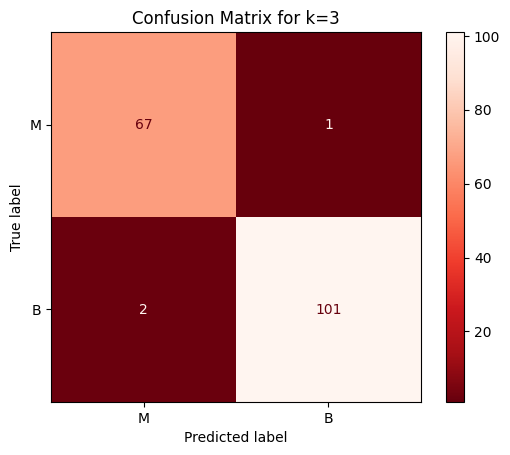

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_3n = confusion_matrix(y_test, y_pred_3n, labels=['M','B'])

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_3n, display_labels=['M','B'])
disp.plot(cmap='Reds_r')
disp.ax_.set_title("Confusion Matrix for k=3")

M = Malignant
B = Benign

From the confusion matrix we can see that we have very minimal false predictions. On the top right we can see actual malignant predicted as benign (1) and on the bottom left we can see actual benign predicted as malignant (2).

On the top left we have **true positive** prediction (67) and on the bottom right we have **true negative** (101) predictions.

